** Lab 3 - feature engineering - Titanic **

In [700]:
#import dependencies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from sklearn.preprocessing import OneHotEncoder

In [701]:
url = "data/Titanic.csv"

In [702]:
titanic_df = pd.read_csv(url)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [703]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [704]:
titanic_df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [705]:
titanic_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<Axes: xlabel='Age', ylabel='Count'>

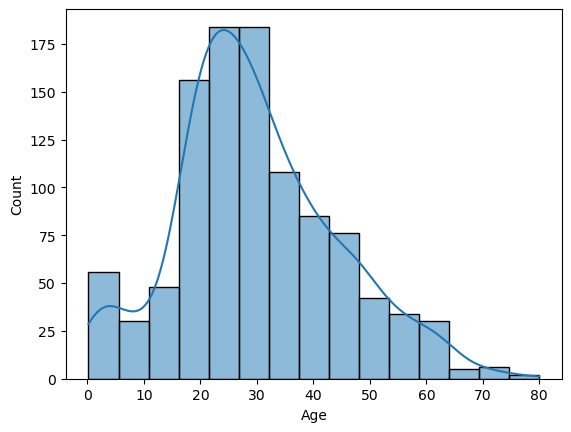

In [706]:
sns.histplot(data=titanic_df, bins=15, x="Age", kde=True)


<Axes: xlabel='Age', ylabel='Survived'>

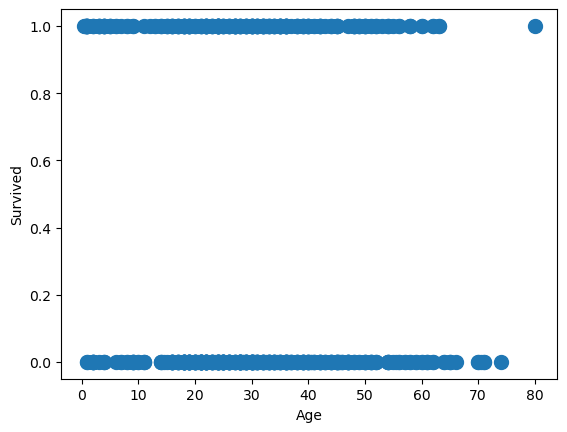

In [707]:
titanic_df.plot.scatter(x="Age", y="Survived", s=100)

In [708]:
titanic_df["Embarked"].fillna("S", inplace=True)

In [709]:
print("mean age:", titanic_df["Age"].mean())

mean age: 29.881137667304014


In [710]:
print("median age:", titanic_df["Age"].median())

median age: 28.0


In [711]:
titanic_df["Age"].fillna(titanic_df["Age"].median(), inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

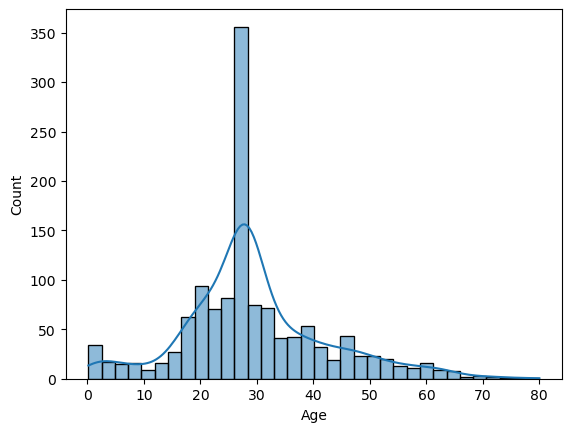

In [712]:
sns.histplot(data=titanic_df, x="Age", kde=True)

<Axes: xlabel='Pclass', ylabel='Fare'>

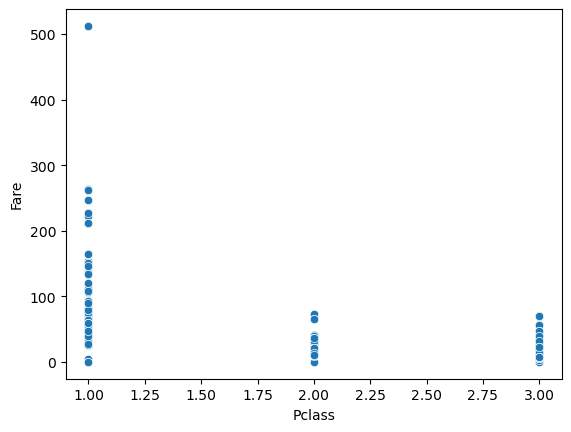

In [713]:
sns.scatterplot(x="Pclass", y="Fare", data=titanic_df)

In [714]:
print("mean fare:", titanic_df["Fare"].mean())

mean fare: 33.29547928134557


In [715]:
avg_fares = titanic_df[titanic_df["Fare"] > 0].groupby("Pclass")["Fare"].mean()
print(avg_fares)

Pclass
1    89.447482
2    21.648108
3    13.378473
Name: Fare, dtype: float64


In [716]:
def replace_zero_fares(row):
    if row["Fare"] == 0:
        return avg_fares[row["Pclass"]]
    else:
        return row["Fare"]
    
titanic_df["Fare"] = titanic_df.apply(replace_zero_fares, axis=1)

<Axes: xlabel='Pclass', ylabel='Fare'>

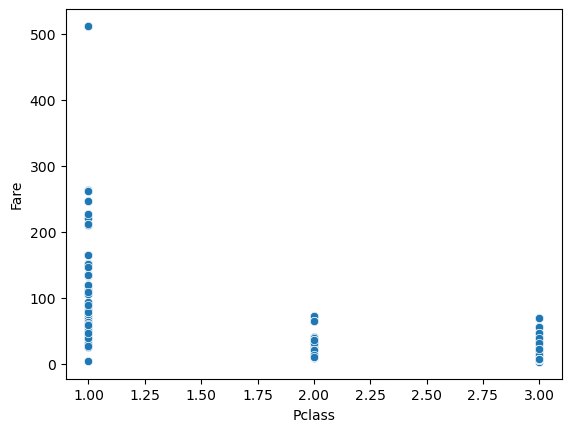

In [717]:
sns.scatterplot(x="Pclass", y="Fare", data=titanic_df)

In [718]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [719]:
titanic_df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
dtype: int64

In [720]:
titanic_df["HasCabin"] = titanic_df.Cabin.notnull()

In [721]:
HasCabin_pclass = titanic_df.groupby(["Pclass", "HasCabin"]).size().unstack()
print(HasCabin_pclass)

HasCabin  False  True 
Pclass                
1            67    256
2           254     23
3           693     16


In [722]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [723]:
titanic_df.drop(columns=["Cabin", "HasCabin"], inplace=True)

In [724]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [725]:
titanic_df["Title"] = titanic_df.Name.apply(lambda name: re.search("([A-Z][a-z]+)\.", name).group(1))

In [726]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [727]:
titanic_df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [728]:
titanic_df["Title"].replace({"Ms":"Miss", "Mlle":"Mrs", "Mme":"Mrs", "Don":"Mrs", "Dona":"Mrs"}, inplace=True)

In [729]:
titanic_df["Title"].replace(["Rev", "Dr", "Col", "Major", "Lady", "Sir", "Capt", "Countess", "Jonkheer"], "Unique", inplace=True)

In [730]:
titanic_df["Title"].value_counts()

Mr        757
Miss      262
Mrs       202
Master     61
Unique     27
Name: Title, dtype: int64

In [731]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


<Axes: xlabel='Title', ylabel='count'>

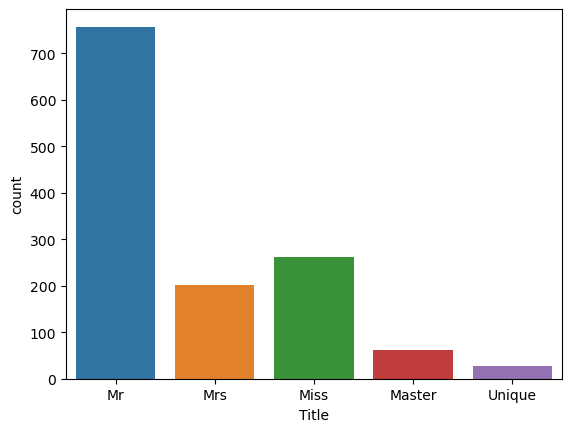

In [732]:
sns.countplot(data=titanic_df, x="Title")

In [733]:
titanic_df["CatAge"] = pd.qcut(titanic_df["Age"], q=4, labels=False)

In [734]:
titanic_df["CatFare"] = pd.qcut(titanic_df["Fare"], q=4, labels=False)

In [735]:
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

In [736]:
ohetransform = ohe.fit_transform(titanic_df[["Sex", "Embarked", "Title"]])

In [737]:
ohetransform.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [738]:
titanic_df = pd.concat([titanic_df, ohetransform], axis=1).drop(columns = ["PassengerId", "Age", "Sex_female", "Name", "Ticket", "Fare", "Sex", "Embarked", "Title"])

In [739]:
titanic_df.head()

,Survived,Pclass,SibSp,Parch,CatAge,CatFare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,0.0,3,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1,1,0,3,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,3,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1,1,0,2,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,3,0,0,2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [740]:
titanic_df.to_csv("data/Titanic_Cleaned.csv", index = False)